**PRBD - UM-01. PODSTAWY**

Twoja firma przechowuje olbrzymie ilości danych (wpisy dzienników zdarzeń, dane finansowe, produkcyjne, pomiary czujników, dane statystyczne, raporty działu HR itd.) i chcesz zwiększyć prawdopodobieństwo wyszukiwania w nich ukrytych skarbów takich jak:
- kategorie klientów oraz określanie najlepszych strategii marketingowych dla każdej z tych grup,
- zoferowanie poszczególnym klientom produktów na podstawie danych zebranych od podobnych klientów,
- wykrywanie potencjalnie nielegalnych transakcji,
- przewidywanie przyszłorocznych obrotów,
- i inne (https://www.kaggle.com/datasets).

wykorzystamy do tego Uczenie Maszynowe

Zaczynamy !

Skorzytamy z gotowej biblioteki:

Biblioteka Scikit-Learn (http://scikit-learn.org/stable/) jest bardzo przystępna, a jednocześnie zawiera wiele wydajnych algorytmów uczenia maszynowego; z tego powodu znakomicie nadaje się dla osób rozpoczynających przygodę z uczeniem maszynowym.

# Konfiguracja

Upewnijmy się najpierw, że notatnik ten będzie działał w środowiskach Python 2 i 3 (BARDZO, BARDZO REKOMENDOWANY), importujmy kilka powszechnie stosowanych modułów, upewnijmy się, że moduł MatplotLib będzie prawidłowo tworzył wykresy, a także przygotujmy funkcję zapisującą rysunki:

In [1]:
# Obsługa środowisk Python 2 i Python 3
from __future__ import division, print_function, unicode_literals

# Importowanie popularnych modułów
import numpy as np
import os

# W celu zachowania powtarzalności wyników w kolejnych przebiegach
np.random.seed(42)

# Generowanie ładnych wykresów
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
plt.rcParams['axes.labelsize'] = 14
plt.rcParams['xtick.labelsize'] = 12
plt.rcParams['ytick.labelsize'] = 12

# Lokacja, w której będą zapisywane rysunki
PROJECT_ROOT_DIR = "."
CHAPTER_ID = "podstawy"
IMAGES_PATH = os.path.join(PROJECT_ROOT_DIR, "rysunki", CHAPTER_ID)

def save_fig(fig_id, tight_layout=True, fig_extension="png", resolution=300):
    os.makedirs(IMAGES_PATH, exist_ok=True)
    path = os.path.join(IMAGES_PATH, fig_id + "." + fig_extension)
    print("Zapisywanie rysunku", fig_id)
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format=fig_extension, dpi=resolution)
    
# Ignorowanie "useless warnings" (see SciPy issue #5998)
import warnings
warnings.filterwarnings(action="ignore", message="^internal gelsd")

# Kod 1.1 - PIENIĄDZE SZCZĘŚCIA NIE DAJĄ... A MOŻE JEDNAK TAK... ?

ZACZYNAMY!

Poniższa funkcja scala dane dotyczące satysfkacji z życia z zestawu OECD oraz informacje o PKB per capita.

In [2]:
def prepare_country_stats(oecd_bli, gdp_per_capita):
    oecd_bli = oecd_bli[oecd_bli["INEQUALITY"]=="TOT"]
    oecd_bli = oecd_bli.pivot(index="Country", columns="Indicator", values="Value")
    gdp_per_capita.rename(columns={"2015": "GDP per capita"}, inplace=True)
    gdp_per_capita.set_index("Country", inplace=True)
    full_country_stats = pd.merge(left=oecd_bli, right=gdp_per_capita,
                                  left_index=True, right_index=True)
    full_country_stats.sort_values(by="GDP per capita", inplace=True)
    remove_indices = [0, 1, 6, 8, 33, 34, 35]
    keep_indices = list(set(range(36)) - set(remove_indices))
    return full_country_stats[["GDP per capita", 'Life satisfaction']].iloc[keep_indices]

Kod pobiera dane z katalogu zestawy_danych/satysfakcja.

In [3]:
import os
datapath = os.path.join("zestawy_danych", "satysfakcja", "")

# Download the data
import urllib
DOWNLOAD_ROOT = "http://users.pja.edu.pl/~adamkass/"
os.makedirs(datapath, exist_ok=True)
for filename in ("oecd_bli_2015.csv", "gdp_per_capita.csv"):
    print("Pobieranie", filename)
    url = DOWNLOAD_ROOT + "zestawy_danych/satysfakcja/" + filename
    urllib.request.urlretrieve(url, datapath + filename)

Pobieranie oecd_bli_2015.csv
Pobieranie gdp_per_capita.csv


Kod służy do wczytywania danych, ich przygotowania, utworzenia wykresu, a także wyuczenia modelu liniowego i prognozowania wyników

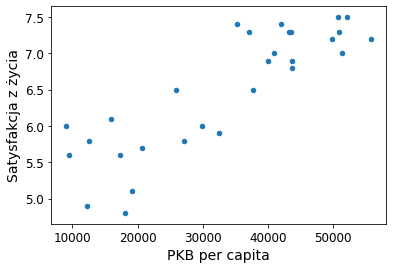

[[5.96242338]]


In [4]:
# Importowane klasy
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import sklearn.linear_model

# Wczytuje dane
oecd_bli = pd.read_csv(datapath + "oecd_bli_2015.csv", thousands=',')
gdp_per_capita = pd.read_csv(datapath + "gdp_per_capita.csv",thousands=',',delimiter='\t',
                             encoding='latin1', na_values="n/a")

# Przygotowuje dane
country_stats = prepare_country_stats(oecd_bli, gdp_per_capita)
X = np.c_[country_stats["GDP per capita"]]
y = np.c_[country_stats["Life satisfaction"]]

country_stats.rename(columns={"GDP per capita": "PKB per capita"}, inplace=True)
country_stats.rename(columns={"Life satisfaction": "Satysfakcja z życia"}, inplace=True)

# Wizualizuje dane
country_stats.plot(kind='scatter', x="PKB per capita", y='Satysfakcja z życia')
plt.show()

# Wybiera model liniowy
model = sklearn.linear_model.LinearRegression()

# Uczy model
model.fit(X, y)

# Oblicza prognozy dla Cypru - nie ma w zestawieniu !
X_new = [[22587]]  # PKB per capita Cypru
print(model.predict(X_new)) # wyniki [[ 5.96242338]]

Uczenie z przykładów/z modelu

Większość zadań uczenia maszynowego polega na sporządzaniu prognoz. Oznacza to, że na podstawie określonej
liczby próbek uczących system musi być w stanie generalizować wyniki na niewidziane wcześniej przykłady. Uzyskanie dobrej szybkości algorytmu wobec danych uczących jest pożądane, ale niewystarczające; prawdziwy cel stanowi dobra wydajność wobec nowych przykładów.

Znamy dwa główne mechanizmy uogólniania: uczenie z przykładów (o tym dalej) i uczenie z modelu.


Dobrym sposobem uogólniania wyników uzyskiwanych z danych uczących jest stworzenie modelu z tych przykładów i użycie go do przewidywania (prognozowania; ang. prediction). Jest to uczenie z modelu (ang. model-based learning).

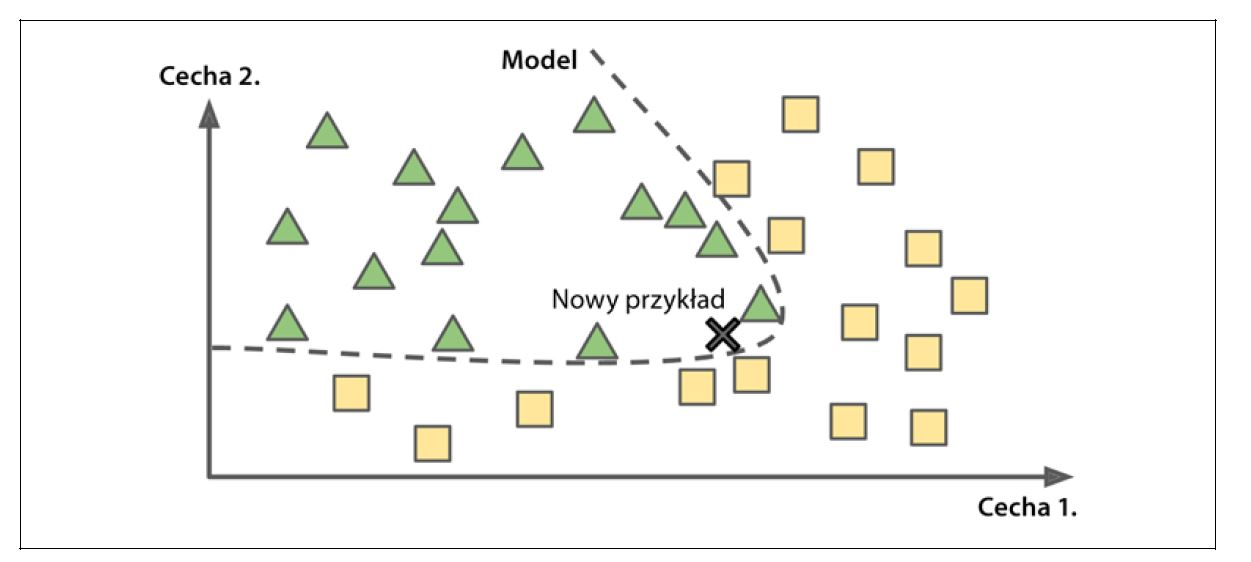

Chcemy sprawdzić, czy pieniądze dają szczęście; w tym celu pobieramy dane Better Life Index ze strony Organizacji Współpracy Gospodarczej i Rozwoju (OECD,http://stats.oecd.org/index.aspx?DataSetCode=BLI),
a także statystyki PKB per capita z witryny Międzynarodowego Funduszu Walutowego (IMF, http://goo.gl/j1MSKe).

Teraz wystarczy połączyć obydwie tabele i posortować dane dotyczące PKB. Tabela ponizej prezentuje fragment uzyskanych informacji.
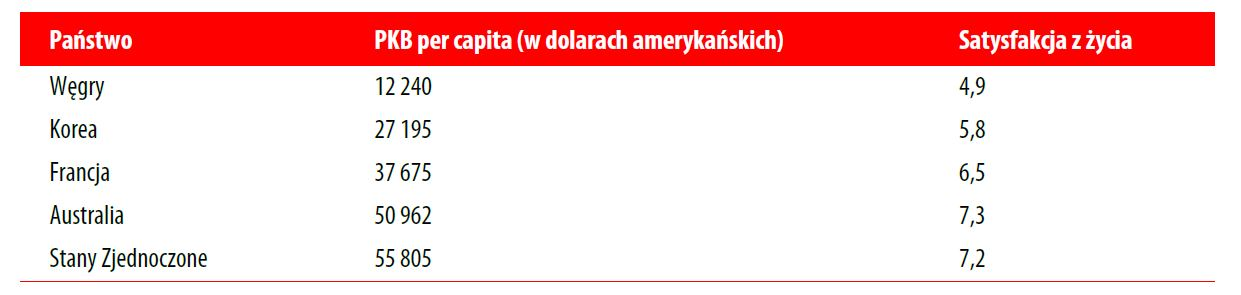

# Wczytanie i przygotowanie danych satysfakcji z życia

In [5]:
import pandas as pd

# Plik CSV do pobrania na stronie http://stats.oecd.org/index.aspx?DataSetCode=BLI

datapath = "zestawy_danych/satysfakcja/"

oecd_bli = pd.read_csv(datapath+"oecd_bli_2015.csv", thousands=',')
oecd_bli = oecd_bli[oecd_bli["INEQUALITY"]=="TOT"]
oecd_bli = oecd_bli.pivot(index="Country", columns="Indicator", values="Value")
oecd_bli.head(2)

Indicator,Air pollution,Assault rate,Consultation on rule-making,Dwellings without basic facilities,Educational attainment,Employees working very long hours,Employment rate,Homicide rate,Household net adjusted disposable income,Household net financial wealth,...,Long-term unemployment rate,Personal earnings,Quality of support network,Rooms per person,Self-reported health,Student skills,Time devoted to leisure and personal care,Voter turnout,Water quality,Years in education
Country,,,,,,,,,,,,,,,,,,,,,
Australia,13.0,2.1,10.5,1.1,76.0,14.02,72.0,0.8,31588.0,47657.0,...,1.08,50449.0,92.0,2.3,85.0,512.0,14.41,93.0,91.0,19.4
Austria,27.0,3.4,7.1,1.0,83.0,7.61,72.0,0.4,31173.0,49887.0,...,1.19,45199.0,89.0,1.6,69.0,500.0,14.46,75.0,94.0,17.0


In [6]:
oecd_bli.rename(columns={"Life satisfaction": "Satysfakcja z życia"}, inplace=True)
oecd_bli["Satysfakcja z życia"].head()

Country
Australia    7.3
Austria      6.9
Belgium      6.9
Brazil       7.0
Canada       7.3
Name: Satysfakcja z życia, dtype: float64

# Wczytanie i przygotowanie danych PKB per capita

In [7]:
# Plik xls do pobrania na stronie http://goo.gl/j1MSKe (=> imf.org) -> zmien nazwe na gdp_per_capita.csv
gdp_per_capita = pd.read_csv(datapath+"gdp_per_capita.csv", thousands=',', delimiter='\t',
                             encoding='latin1', na_values="n/a")
gdp_per_capita.rename(columns={"2015": "PKB per capita"}, inplace=True)
gdp_per_capita.set_index("Country", inplace=True)
gdp_per_capita.head(2)

,Subject Descriptor,Units,Scale,Country/Series-specific Notes,PKB per capita,Estimates Start After
Country,,,,,,
Afghanistan,"Gross domestic product per capita, current prices",U.S. dollars,Units,"See notes for: Gross domestic product, curren...",599.994,2013.0
Albania,"Gross domestic product per capita, current prices",U.S. dollars,Units,"See notes for: Gross domestic product, curren...",3995.383,2010.0


In [8]:
full_country_stats = pd.merge(left=oecd_bli, right=gdp_per_capita, left_index=True, right_index=True)
full_country_stats.sort_values(by="PKB per capita", inplace=True)
full_country_stats

,Air pollution,Assault rate,Consultation on rule-making,Dwellings without basic facilities,Educational attainment,Employees working very long hours,Employment rate,Homicide rate,Household net adjusted disposable income,Household net financial wealth,...,Time devoted to leisure and personal care,Voter turnout,Water quality,Years in education,Subject Descriptor,Units,Scale,Country/Series-specific Notes,PKB per capita,Estimates Start After
Country,,,,,,,,,,,,,,,,,,,,,
Brazil,18.0,7.9,4.0,6.7,45.0,10.41,67.0,25.5,11664.0,6844.0,...,14.97,79.0,72.0,16.3,"Gross domestic product per capita, current prices",U.S. dollars,Units,"See notes for: Gross domestic product, curren...",8669.998,2014.0
Mexico,30.0,12.8,9.0,4.2,37.0,28.83,61.0,23.4,13085.0,9056.0,...,13.89,63.0,67.0,14.4,"Gross domestic product per capita, current prices",U.S. dollars,Units,"See notes for: Gross domestic product, curren...",9009.280,2015.0
Russia,15.0,3.8,2.5,15.1,94.0,0.16,69.0,12.8,19292.0,3412.0,...,14.97,65.0,56.0,16.0,"Gross domestic product per capita, current prices",U.S. dollars,Units,"See notes for: Gross domestic product, curren...",9054.914,2015.0
Turkey,35.0,5.0,5.5,12.7,34.0,40.86,50.0,1.2,14095.0,3251.0,...,13.42,88.0,62.0,16.4,"Gross domestic product per capita, current prices",U.S. dollars,Units,"See notes for: Gross domestic product, curren...",9437.372,2013.0
Hungary,15.0,3.6,7.9,4.8,82.0,3.19,58.0,1.3,15442.0,13277.0,...,15.04,62.0,77.0,17.6,"Gross domestic product per capita, current prices",U.S. dollars,Units,"See notes for: Gross domestic product, curren...",12239.894,2015.0
Poland,33.0,1.4,10.8,3.2,90.0,7.41,60.0,0.9,17852.0,10919.0,...,14.20,55.0,79.0,18.4,"Gross domestic product per capita, current prices",U.S. dollars,Units,"See notes for: Gross domestic product, curren...",12495.334,2014.0
Chile,46.0,6.9,2.0,9.4,57.0,15.42,62.0,4.4,14533.0,17733.0,...,14.41,49.0,73.0,16.5,"Gross domestic product per capita, current prices",U.S. dollars,Units,"See notes for: Gross domestic product, curren...",13340.905,2014.0
Slovak Republic,13.0,3.0,6.6,0.6,92.0,7.02,60.0,1.2,17503.0,8663.0,...,14.99,59.0,81.0,16.3,"Gross domestic product per capita, current prices",U.S. dollars,Units,"See notes for: Gross domestic product, curren...",15991.736,2015.0
Czech Republic,16.0,2.8,6.8,0.9,92.0,6.98,68.0,0.8,18404.0,17299.0,...,14.98,59.0,85.0,18.1,"Gross domestic product per capita, current prices",U.S. dollars,Units,"See notes for: Gross domestic product, curren...",17256.918,2015.0


In [9]:
full_country_stats[["PKB per capita", 'Satysfakcja z życia']].loc["United States"]

PKB per capita         55805.204
Satysfakcja z życia        7.200
Name: United States, dtype: float64

In [10]:
remove_indices = [0, 1, 6, 8, 33, 34, 35]
keep_indices = list(set(range(36)) - set(remove_indices))

#full_data = full_country_stats[["PKB per capita", 'Satysfakcja z życia']]
sample_data = full_country_stats[["PKB per capita", 'Satysfakcja z życia']].iloc[keep_indices]
missing_data = full_country_stats[["PKB per capita", 'Satysfakcja z życia']].iloc[remove_indices]

Wygenerujmy teraz wykres danych dla kilku przykładowych krajów:

Zapisywanie rysunku wykres_punktowy_pieniądze_i_szczęście


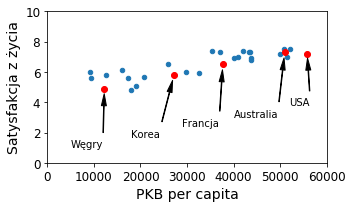

In [11]:
sample_data.plot(kind='scatter', x="PKB per capita", y='Satysfakcja z życia', figsize=(5,3))
plt.axis([0, 60000, 0, 10])
position_text = {
    "Hungary": (5000, 1),
    "Korea": (18000, 1.7),
    "France": (29000, 2.4),
    "Australia": (40000, 3.0),
    "United States": (52000, 3.8),
}
for country, pos_text in position_text.items():
    pos_data_x, pos_data_y = sample_data.loc[country]
    country = "USA" if country == "United States" else country
    country = "Węgry" if country == "Hungary" else country
    country = "Francja" if country == "France" else country
    plt.annotate(country, xy=(pos_data_x, pos_data_y), xytext=pos_text,
            arrowprops=dict(facecolor='black', width=0.5, shrink=0.1, headwidth=5))
    plt.plot(pos_data_x, pos_data_y, "ro")
save_fig('wykres_punktowy_pieniądze_i_szczęście')
plt.show()

Możemy dostrzec tu pewien trend! Pomimo tego, że dane są zaszumione (tzn. częściowo losowe), wygląda na to, że poziom satysfakcji z życia wzrasta w sposób mniej więcej liniowy wraz ze wzrostem produktu krajowego brutto na osobę. Postanawiamy zatem stworzyć model satysfakcji z życia jako funkcji liniowej wobec parametru PKB per capita. Etap ten nazywamy doborem modelu: wybraliśmy model liniowy satysfakcji z życia wykorzystujący tylko jeden atrybut — PKB per capita 

In [12]:
sample_data.to_csv("satysfakcja_z_życia_a_PKB_per_capita.csv") # export do csv

In [13]:
sample_data.loc[list(position_text.keys())]

,PKB per capita,Satysfakcja z życia
Country,,
Hungary,12239.894,4.9
Korea,27195.197,5.8
France,37675.006,6.5
Australia,50961.865,7.3
United States,55805.204,7.2


Prosty model liniowy:

satysfakcja_z_życia = $\theta_0 + \theta_1$ x PKB_per_capita

Model ten zawiera dwa parametry: $\theta_0 , \theta_1$
 
Poprzez modyfikowanie tych parametrów możemy za ich pomocą uzyskać dowolną funkcję liniową

Zapisywanie rysunku wykres_do_poprawki_parametry_modelu


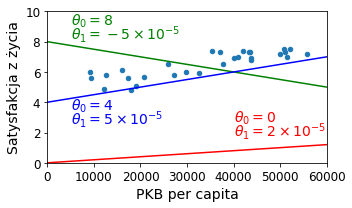

In [14]:
import numpy as np

sample_data.plot(kind='scatter', x="PKB per capita", y='Satysfakcja z życia', figsize=(5,3))
plt.axis([0, 60000, 0, 10])
X=np.linspace(0, 60000, 1000)
plt.plot(X, 2*X/100000, "r")
plt.text(40000, 2.7, r"$\theta_0 = 0$", fontsize=14, color="r")
plt.text(40000, 1.8, r"$\theta_1 = 2 \times 10^{-5}$", fontsize=14, color="r")
plt.plot(X, 8 - 5*X/100000, "g")
plt.text(5000, 9.1, r"$\theta_0 = 8$", fontsize=14, color="g")
plt.text(5000, 8.2, r"$\theta_1 = -5 \times 10^{-5}$", fontsize=14, color="g")
plt.plot(X, 4 + 5*X/100000, "b")
plt.text(5000, 3.5, r"$\theta_0 = 4$", fontsize=14, color="b")
plt.text(5000, 2.6, r"$\theta_1 = 5 \times 10^{-5}$", fontsize=14, color="b")
save_fig('wykres_do_poprawki_parametry_modelu')
plt.show()

Zanim zaczniemy korzystać z modelu, musimy zdefiniować wartości jego parametrów $\theta_0$ i $\theta_1$. 

Skąd mamy wiedzieć, które wartości nadają się najlepiej dla danego modelu? 

Możemy wyznaczyć funkcję użyteczności (zwaną także funkcją dopasowania), mówiącą nam, jak dobry jest dany model, lub funkcję kosztu, mającą przeciwne zastosowanie. 

W zagadnieniach wykorzystujących regresję liniową zazwyczaj jest stosowana funkcja kosztu mierząca odległości pomiędzy przewidywaniami modelu liniowego a przykładami uczącymi.

Naszym zadaniem jest zminimalizowanie tego dystansu.

Wykorzystamy algorytm regresji liniowej: dostarczamy mu dane uczące, a on określa parametry najlepiej pasujące do danego modelu liniowego. Proces ten nosi nazwę uczenia (trenowania) modelu. W naszym przykładzie algorytm regresji liniowej wyznacza następujące optymalne wartości parametrów: $\theta_0 = 4.85$ i $\theta_1 = 4.91 \times 10^{-5}$.

In [15]:
from sklearn import linear_model
lin1 = linear_model.LinearRegression()
Xsample = np.c_[sample_data["PKB per capita"]]
ysample = np.c_[sample_data["Satysfakcja z życia"]]
lin1.fit(Xsample, ysample)
t0, t1 = lin1.intercept_[0], lin1.coef_[0][0]
t0, t1

(4.853052800266436, 4.911544589158484e-05)

Teraz nasz model jest maksymalnie dopasowany do danych uczących (jak na model liniowy)

Zapisywanie rysunku wykres_najlepiej_dopasowanego_modelu


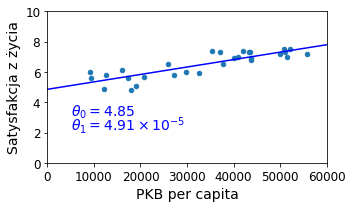

In [16]:
sample_data.plot(kind='scatter', x="PKB per capita", y='Satysfakcja z życia', figsize=(5,3))
plt.axis([0, 60000, 0, 10])
X=np.linspace(0, 60000, 1000)
plt.plot(X, t0 + t1*X, "b")
plt.text(5000, 3.1, r"$\theta_0 = 4.85$", fontsize=14, color="b")
plt.text(5000, 2.2, r"$\theta_1 = 4.91 \times 10^{-5}$", fontsize=14, color="b")
save_fig('wykres_najlepiej_dopasowanego_modelu')
plt.show()


Jak szczęśliwi są Cypryjczycy? - informacji tej nie znajdziemy w bazie danych OECD...

Możemy posłużyć się modelem, aby uzyskać wiarygodne przewidywania: sprawdzamy wartość PKB per capita dla Cypru (22 587 dolarów), a po uruchomieniu modelu dowiadujemy się, że współczynnik satysfakcji z życia oscyluje wokół wartości:

In [17]:
cyprus_gdp_per_capita = gdp_per_capita.loc["Cyprus"]["PKB per capita"]
print(cyprus_gdp_per_capita)
cyprus_predicted_life_satisfaction = lin1.predict([[cyprus_gdp_per_capita]])[0][0]
cyprus_predicted_life_satisfaction

22587.49


5.96244744318815

Zapisywanie rysunku wykres_prognoz_dla_Cypru


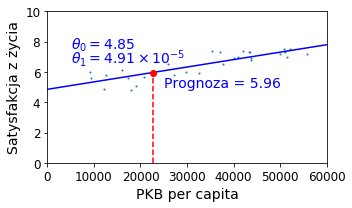

In [18]:
sample_data.plot(kind='scatter', x="PKB per capita", y='Satysfakcja z życia', figsize=(5,3), s=1)
X=np.linspace(0, 60000, 1000)
plt.plot(X, t0 + t1*X, "b")
plt.axis([0, 60000, 0, 10])
plt.text(5000, 7.5, r"$\theta_0 = 4.85$", fontsize=14, color="b")
plt.text(5000, 6.6, r"$\theta_1 = 4.91 \times 10^{-5}$", fontsize=14, color="b")
plt.plot([cyprus_gdp_per_capita, cyprus_gdp_per_capita], [0, cyprus_predicted_life_satisfaction], "r--")
plt.text(25000, 5.0, r"Prognoza = 5.96", fontsize=14, color="b")
plt.plot(cyprus_gdp_per_capita, cyprus_predicted_life_satisfaction, "ro")
save_fig('wykres_prognoz_dla_Cypru')
plt.show()

Uczenie z przykładów:

Prawdopodobnie najprostszą formą nauki jest „wykuwanie na blachę”. Gdybyśmy stworzyli w ten sposób filtr spamu, oznaczałby po prostu wszystkie wiadomości identyczne z oznakowanymi przez użytkowników — rozwiązanie nie najgorsze, ale zarazem nie najlepsze.

Zamiast oznaczać wiadomości identyczne z rozpoznanym wcześniej spamem, możemy zaprogramować filtr w taki sposób, aby znakował również wiadomości bardzo podobne do powszechnie rozpoznawanych wzorców. Potrzebna staje się jakaś miara podobieństwa dwóch wiadomości e-mail.

Może ją stanowić (w wielkim uproszczeniu) porównanie liczby takich samych słów występujących w obydwu wiadomościach. Filtr mógłby oznaczać wiadomość jako spam, jeśli będzie miała wiele słów wspólnych ze znanym spamem.

Mamy tu do czynienia z uczeniem z przykładów (ang. instance-based learning): system uczy się przykładów„na pamięć”, a następnie porównuje (generalizuje) je z nowymi przypadkami za pomocą miary podobieństwa:
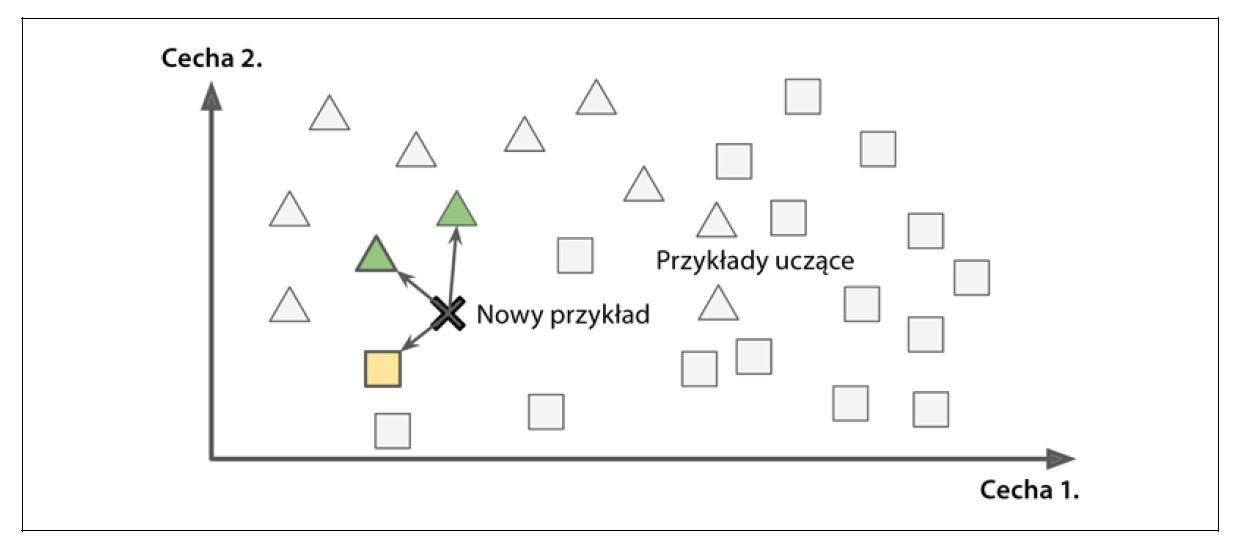

In [19]:
sample_data[7:10]

,PKB per capita,Satysfakcja z życia
Country,,
Portugal,19121.592,5.1
Slovenia,20732.482,5.7
Spain,25864.721,6.5


Algorytmu uczenia z przykładów -> wartość PKB najbardziej zbliżoną do Cypru ma Słowenia (20 732 dolary).

Dzięki danym OECD wiemy, że współczynnik satysfakcji z życia wynosi u Słoweńców 5,7, wiec moglibyśmy w drodze analogii stwierdzić, że jego wartość dla Cypryjczyków powinna być bardzo podobna. 

Po nieznacznym „oddaleniu skali” i przyjrzeniu się dwóm kolejnym państwom o zbliżonej wartości satysfakcji z życia okaże się, że są to Portugalia (5,1) i Hiszpania (6,5). 

Średnia tych trzech wartości wynosi 5,77, co stanowi wartość całkiem zbliżoną do wyliczonej przez nasz model.

Wspomniany tu prosty algorytm nosi nazwę regresji k-najbliższych sąsiadów (ang. k-nearest neighbors); 
w tym przykładzie k = 3.

Aby zastąpić algorytm regresji liniowej algorytmem k-najbliższych sąsiadów, wystarczy podmienić wiersz:

**model = sklearn.linear_model.LinearRegression()**

na następujący:

**model = sklearn.neighbors.KNeighborsRegressor(n_neighbors=3)**

In [20]:
(5.1+5.7+6.5)/3

5.766666666666667

In [21]:
backup = oecd_bli, gdp_per_capita

def prepare_country_stats(oecd_bli, gdp_per_capita):
    return sample_data

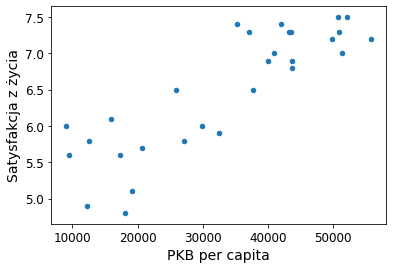

[[5.96242338]]


In [24]:
# Importuje klasy
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import sklearn

# Wczytuje dane
oecd_bli = pd.read_csv(datapath + "oecd_bli_2015.csv", thousands=',')
gdp_per_capita = pd.read_csv(datapath + "gdp_per_capita.csv",thousands=',',delimiter='\t',
                             encoding='latin1', na_values="n/a")

# Przygotowuje dane
country_stats = prepare_country_stats(oecd_bli, gdp_per_capita)
X = np.c_[country_stats["PKB per capita"]]
y = np.c_[country_stats["Satysfakcja z życia"]]

# print (country_stats)
# print (sample_data)

# Wizualizuje dane
country_stats.plot(kind='scatter', x="PKB per capita", y='Satysfakcja z życia')
plt.show()

# Wybiera model liniowy
model = sklearn.linear_model.LinearRegression()

# Uczy model
model.fit(X, y)

# Oblicza prognozę dla Cypru
X_new = [[22587]]  # PKB per capita Cypru
print(model.predict(X_new)) # wyniki [[ 5.96242338]]

**Jeśli wszystko zostało dobrze wykonane, Twój model powinien wyliczać dobre prognozy.**

W przeciwnym wypadku może być konieczne wykorzystanie większej liczby atrybutów (stopy zatrudnienia,zdrowia społeczeństwa, zanieczyszczenia powietrza itd.), zdobycie więcej danych uczących lub danych lepszej jakości, ewentualnie skorzystanie z wydajniejszego modelu (np. algorytmu regresji wielomianowej).

Podsumowując:
- Przeanalizowaliśmy dane.
- Wybraliśmy model.
- Wytrenowaliśmy go na danych uczących (np. algorytm uczący wyszukał wartości parametrów pozwalających na zminimalizowanie funkcji kosztu).
- Na końcu wykorzystaliśmy wytrenowany model do prognozowania wyników dla nowych przypadków (jest to tzw. wnioskowanie) z nadzieją, że będzie on skutecznie generalizował zdobytą wiedzę.

***Tak właśnie wygląda typowy projekt uczenia maszynowego.***

------------------------------------------------
**Główne problemy uczenia maszynowego**

Skoro naszym głównym zadaniem jest dobór algorytmu uczącego i wyuczenie go za pomocą określonych danych, to dwoma największymi zagrożeniami są **„zły algorytm”** i **„złe dane”.**

Zacznijmy od przyjrzenia się niewłaściwym danym.

Aby większość algorytmów działała prawidłowo, należy im zapewnić mnóstwo danych. Nawet w przypadku bardzo prostych problemów należy zazwyczaj dostarczyć tysiące przykładów, natomiast bardziej zaawansowane zagadnienia, takie jak rozpoznawanie mowy, wymagają nawet milionów próbek.

In [28]:
oecd_bli, gdp_per_capita = backup

In [29]:
sample_data

,PKB per capita,Satysfakcja z życia
Country,,
Russia,9054.914,6.0
Turkey,9437.372,5.6
Hungary,12239.894,4.9
Poland,12495.334,5.8
Slovak Republic,15991.736,6.1
Estonia,17288.083,5.6
Greece,18064.288,4.8
Portugal,19121.592,5.1
Slovenia,20732.482,5.7


In [30]:
missing_data

,PKB per capita,Satysfakcja z życia
Country,,
Brazil,8669.998,7.0
Mexico,9009.280,6.7
Chile,13340.905,6.7
Czech Republic,17256.918,6.5
Norway,74822.106,7.4
Switzerland,80675.308,7.5
Luxembourg,101994.093,6.9


In [34]:
position_text2 = {
    "Brazil": (1000, 9.0),
    "Mexico": (11000, 9.0),
    "Chile": (25000, 9.0),
    "Czech Republic": (35000, 9.0),
    "Norway": (60000, 3),
    "Switzerland": (72000, 3.0),
    "Luxembourg": (90000, 3.0),
}

**Niereprezentatywne dane uczące**

Aby proces uogólniania przebiegał skutecznie, dane uczące muszą być reprezentatywne wobec nowych danych, wobec których nastąpi generalizacja.

Zarówno dla uczenia z przykładów,jak i dla uczenia z modelu.

Na przykład zbiór krajów użyty przez nas do trenowania modelu liniowego nie był doskonale reprezentatywny;
brakuje w nim kilku państw. 

Ponizej widzimy, jak będą wyglądać dane po dodaniu tych kilku brakujących krajów.

Model wyuczony za pomocą tych danych został ukazany w postaci linii ciągłej, natomiast stary model jest reprezentowany przez linię przerywaną.

**Jak widać, dodanie kilku brakujących krajów nie tylko w znaczny sposób modyfikuje dany model, ale pozwala nam również uzmysłowić sobie, że prosty model liniowy raczej nigdy nie będzie bardzo dokładny.**

Wygląda na to, że **mieszkańcy bardzo bogatych państw** nie są szczęśliwsi od ich odpowiedników w średnio zamożnych krajach (wydaje się wręcz,że **są bardziej nieszczęśliwi**), a z kolei ludność wielu ubogich państw wydaje się znacznie szczęśliwsza od populacji bogatych krajów.

Za pomocą niereprezentatywnego zbioru danych wyuczyliśmy model, który raczej nie będzie generował dokładnych prognoz, zwłaszcza w przypadku krajów ubogich i bardzo zamożnych.

Jest niezwykle istotne, aby zbiór danych uczących był reprezentatywny wobec generalizowanych przypadków. Często jest to trudniej osiągnąć, niż się wydaje: jeżeli przykład będzie zbyt mały, musisz liczyć się z zaszumieniem próbkowania (ang. sampling noise; niereprezentatywne dane pojawiają się tu w wyniku przypadku), ale nawet olbrzymie zbiory danych mogą nie być reprezentatywne, jeśli użyta zostanie niewłaściwa metoda próbkowania. W tym przypadku mamy do czynienia z obciążeniem próbkowania (ang. sampling bias).

Zapisywanie rysunku wykres_punktowy_reprezentatywnych_danych_uczących


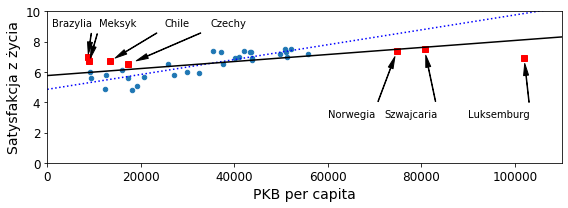

In [38]:
sample_data.plot(kind='scatter', x="PKB per capita", y='Satysfakcja z życia', figsize=(8,3))
plt.axis([0, 110000, 0, 10])

for country, pos_text in position_text2.items():
    pos_data_x, pos_data_y = missing_data.loc[country]
    country = "Brazylia" if country == "Brazil" else country
    country = "Meksyk" if country == "Mexico" else country
    country = "Czechy" if country == "Czech Republic" else country
    country = "Norwegia" if country == "Norway" else country
    country = "Szwajcaria" if country == "Switzerland" else country
    country = "Luksemburg" if country == "Luxembourg" else country
    plt.annotate(country, xy=(pos_data_x, pos_data_y), xytext=pos_text,
            arrowprops=dict(facecolor='black', width=0.5, shrink=0.1, headwidth=5))
    plt.plot(pos_data_x, pos_data_y, "rs")

X=np.linspace(0, 110000, 1000)
plt.plot(X, t0 + t1*X, "b:")

lin_reg_full = linear_model.LinearRegression()
Xfull = np.c_[full_country_stats["PKB per capita"]]
yfull = np.c_[full_country_stats["Satysfakcja z życia"]]
lin_reg_full.fit(Xfull, yfull)

t0full, t1full = lin_reg_full.intercept_[0], lin_reg_full.coef_[0][0]
X = np.linspace(0, 110000, 1000)
plt.plot(X, t0full + t1full * X, "k")

save_fig('wykres_punktowy_reprezentatywnych_danych_uczących')
plt.show()

----------------------------------------
**Przetrenowanie danych uczących**

Ludzie często mają tendencję do nadmiernego generalizowania i, niestety, maszyny równie łatwo wpadają w tę pułapkę, jeśli nie zachowamy ostrożności. 

Zjawisko to w terminologii uczenia maszynowego nosi nazwę przetrenowania albo nadmiernego dopasowania (ang. overfitting). 

Termin ten oznacza, że model sprawdza się w przypadku danych uczących, ale sam proces uogólniania nie
sprawuje się zbyt dobrze.

Na kolejnym rysunku widzimy przykład wielomianowego modelu satysfakcji z życia o olbrzymim stopniu
przetrenowania za pomocą danych uczących. Nawet jeśli sprawuje się on znacznie lepiej wobec
danych uczących niż zwykły model liniowy, to czy moglibyśmy zawierzyć jego prognozom?

Jeżeli zbiór danych uczących jest zaszumiony lub zbyt mały (ryzyko zaszumienia próbkowania),
to model ten prawdopodobnie będzie wykrywał wzorce nie w użytecznych danych, lecz w szumie.

/home/student/.local/lib/python3.6/site-packages/numpy/lib/nanfunctions.py:1546: RuntimeWarning: overflow encountered in multiply
  sqr = np.multiply(arr, arr, out=arr)
/home/student/.local/lib/python3.6/site-packages/numpy/core/fromnumeric.py:90: RuntimeWarning: overflow encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)


Zapisywanie rysunku wykres_przetrenowanego_modelu


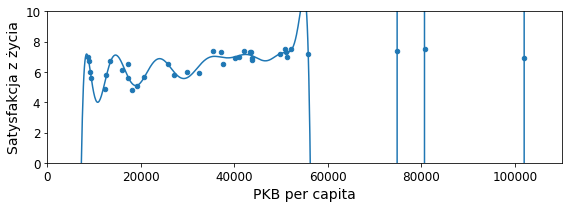

In [42]:
full_country_stats.plot(kind='scatter', x="PKB per capita", y='Satysfakcja z życia', figsize=(8,3))
plt.axis([0, 110000, 0, 10])

from sklearn import preprocessing
from sklearn import pipeline

poly = preprocessing.PolynomialFeatures(degree=60, include_bias=False)
scaler = preprocessing.StandardScaler()
lin_reg2 = linear_model.LinearRegression()

pipeline_reg = pipeline.Pipeline([('poly', poly), ('scal', scaler), ('lin', lin_reg2)])
pipeline_reg.fit(Xfull, yfull)
curve = pipeline_reg.predict(X[:, np.newaxis])
plt.plot(X, curve)
save_fig('wykres_przetrenowanego_modelu')
plt.show()

**Zjawisko przetrenowania występuje, gdy model jest zbyt skomplikowany w porównaniu do ilości lub zaszumienia danych uczących.**

W takich przypadkach możliwe są następujące rozwiązania:
- uproszczenie modelu poprzez wybór zawierającego mniej parametrów (np. modelu liniowego w miejsce modelu wielomianowego), zmniejszenie liczby atrybutów w danych uczących lub ograniczenie modelu,
- uzyskanie większej ilości danych uczących,
- zmniejszenie zaszumienia danych uczących (np. poprzez usunięcie błędnych danych lub elementów odstających).

**Ograniczenie modelu w celu jego uproszczenia i zmniejszenia ryzyka przetrenowania nosi nazwę regularyzacji (ang. regularization).**

In [43]:
full_country_stats.loc[[c for c in full_country_stats.index if "W" in c.upper()]]["Satysfakcja z życia"]

Country
New Zealand    7.3
Sweden         7.2
Norway         7.4
Switzerland    7.5
Name: Satysfakcja z życia, dtype: float64

Powiedzmy, że dostarczamy modelowi satysfakcji z życia wiele dodatkowych atrybutów, w tym takich nieprzydatnych, jak nazwy państw. W takiej sytuacji złożony model może wykrywać takie wzorce, jak np. wskaźnik satysfakcji z życia przekraczający wartość 7 w krajach mających w nazwie literę „w”: Nowa Zelandia (7,3), Norwegia(7,4), Szwecja (7,2)czy Szwajcaria (7,5). 

Czy mamy pewność, że ta „reguła litery »w«” dotyczy również takich państw, jak Rwanda lub Zimbabwe? Oczywiście, wzorzec ten wystąpił w danych uczących zupełnie przypadkowo, ale model nie jest w stanie stwierdzić, czy taki szablon  jest rzeczywisty,czy stanowi wynik zaszumienia danych.

In [44]:
gdp_per_capita.loc[[c for c in gdp_per_capita.index if "W" in c.upper()]].head()

,Subject Descriptor,Units,Scale,Country/Series-specific Notes,PKB per capita,Estimates Start After
Country,,,,,,
Botswana,"Gross domestic product per capita, current prices",U.S. dollars,Units,"See notes for: Gross domestic product, curren...",6040.957,2008.0
Kuwait,"Gross domestic product per capita, current prices",U.S. dollars,Units,"See notes for: Gross domestic product, curren...",29363.027,2014.0
Malawi,"Gross domestic product per capita, current prices",U.S. dollars,Units,"See notes for: Gross domestic product, curren...",354.275,2011.0
New Zealand,"Gross domestic product per capita, current prices",U.S. dollars,Units,"See notes for: Gross domestic product, curren...",37044.891,2015.0
Norway,"Gross domestic product per capita, current prices",U.S. dollars,Units,"See notes for: Gross domestic product, curren...",74822.106,2015.0


Poniszy rysunek prezentuje trzy modele: linia kropkowana symbolizuje nasz oryginalny model wytrenowany pod nieobecność kilku krajów, linia kreskowana ukazuje nasz model wyuczony przy użyciu pełnego zakresu danych, natomiast linia ciągła reprezentuje model wytrenowany za pomocą takich samych danych, jak w pierwszym przypadku, ale przy wprowadzonej regularyzacji. 

Widzimy,że w wyniku regularyzacji funkcja ma trochę mniejsze nachylenie, co sprawia, że jest nieco mniejdopasowana do danych uczących, ale za to sprawuje się lepiej w procesie uogólniania nowych przykładów

Zapisywanie rysunku wykres_modelu_grzbietowego


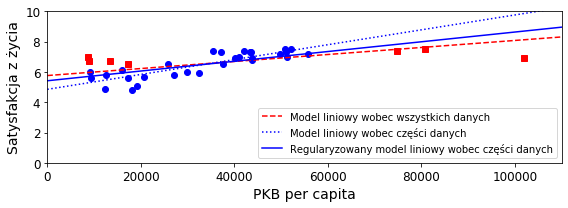

In [45]:
plt.figure(figsize=(8,3))

plt.xlabel("PKB per capita")
plt.ylabel('Satysfakcja z życia')

plt.plot(list(sample_data["PKB per capita"]), list(sample_data["Satysfakcja z życia"]), "bo")
plt.plot(list(missing_data["PKB per capita"]), list(missing_data["Satysfakcja z życia"]), "rs")

X = np.linspace(0, 110000, 1000)
plt.plot(X, t0full + t1full * X, "r--", label="Model liniowy wobec wszystkich danych")
plt.plot(X, t0 + t1*X, "b:", label="Model liniowy wobec części danych")

ridge = linear_model.Ridge(alpha=10**9.5)
Xsample = np.c_[sample_data["PKB per capita"]]
ysample = np.c_[sample_data["Satysfakcja z życia"]]
ridge.fit(Xsample, ysample)
t0ridge, t1ridge = ridge.intercept_[0], ridge.coef_[0][0]
plt.plot(X, t0ridge + t1ridge * X, "b", label="Regularyzowany model liniowy wobec części danych")

plt.legend(loc="lower right")
plt.axis([0, 110000, 0, 10])
save_fig('wykres_modelu_grzbietowego')
plt.show()

**Stopień regularyzacji przeprowadzanej na etapie nauki możemy kontrolować za pomocą hiperparametrów(ang. hyperparameters), są to parametry algorytmu uczącego (nie całego modelu).**

Nie są one modyfikowane przez sam algorytm uczący; należy je wyznaczyć tuż przed rozpoczęciem procesu uczenia i w jego trakcie ich wartości pozostają niezmienne. 

Jeśli wyznaczysz bardzo dużą wartość hiperparametru regularyzacji, uzyskana funkcja będzie niemal płaska (będzie miała niemal zerowe nachylenie); algorytm uczący prawie na pewno nie ulegnie przetrenowaniu, ale jednocześnie trudniej będzie mu znaleźć prawidłowe rozwiązanie.

Strojenie hiperparametrów stanowi istotną część tworzenia systemu uczenia maszynowego, ale o tym poźniej...

In [47]:
backup = oecd_bli, gdp_per_capita

def prepare_country_stats(oecd_bli, gdp_per_capita):
    return sample_data

In [48]:
# Zastępuje ten model liniowy:
import sklearn.linear_model
model = sklearn.linear_model.LinearRegression()

In [49]:
# modelem regresji k-najbliższych sąsiadów:
import sklearn.neighbors
model = sklearn.neighbors.KNeighborsRegressor(n_neighbors=3)

In [50]:
X = np.c_[country_stats["PKB per capita"]]
y = np.c_[country_stats["Satysfakcja z życia"]]

# Uczy model
model.fit(X, y)

# Oblicza prognozę dla Cypru
X_new = np.array([[22587.0]])  # PKB per capita Cypru
print(model.predict(X_new)) # wyniki [[ 5.76666667]]

[[5.76666667]]


Wiemy już coraz więcej na temat uczenia maszynowego. 

- Uczenie maszynowe polega na ciągłym usprawnianiu wykonywania zadań przez urządzenie poprzez jego uczenie się z danych, a nie jawne dopisywanie nowych reguł do kodu.

- Istnieje wiele różnych metod uczenia maszynowego: nadzorowane, nienadzorowane, wsadowe, przyrostowe, z przykładów, z modelu itd.

- W projekcie uczenia maszynowego gromadzimy dane w zbiorze uczącym, który następnie dostarczamy algorytmowi uczącemu. Jeśli wykorzystujemy technikę uczenia z modelu, pewne parametry zostają dostrojone do zbioru danych uczących (np. w celu uzyskiwania dokładnych prognoz wobec samych danych uczących), dzięki czemu model ten może również dobrze przewidywać wyniki wobec nowych przykładów. Z kolei w metodach uczenia z przykładów próbki zostają po prostu wyuczone „na pamięć”, a model wykorzystuje miarę podobieństwa do uogólniania wyników na nowe przykłady.
- System nie będzie dobrze spełniał swojego zadania, jeżeli zbiór danych testowych jest zbyt mały,same dane są niereprezentatywne, zaszumione lub zaśmiecone nieistotnymi cechami (z gipsu tortu nie ulepisz). Model nie może być również zbyt prosty (niedotrenowanie) ani zbyt skomplikowany(przetrenowanie).

----------------------------------
**WAŻNE**
Po wyuczeniu modelu nie wystarczy sama nadzieja na skuteczne uogólnianie nowych próbek. Trzeba ocenić wydajność modelu i w razie potrzeby dostroić go do swoich potrzeb.

---------------------------
Jedynym sposobem sprawdzenia, jak dobrze model generalizuje wyniki, jest wypróbowanie go na nowych danych. 

Możemy, na przykład, zaimplementować go w środowisku produkcyjnym i monitorować jego wydajność. Jest to skuteczne rozwiązanie, ale jeśli model okaże się beznadziejny, użytkownicy będą narzekać...

Najlepszym pomysłem jest podział danych na dwa zestawy: zbiór uczący (ang. training set) i zbiór testowy (ang. test set). Zgodnie z tymi nazwami, model trenujemy za pomocą zbioru uczącego, a sprawdzamy przy użyciu zbioru testowego. Współczynnik błędu uzyskiwany dla nowych przykładów nosi nazwę błędu uogólniania (lub błędu generalizacji), a dzięki zbiorowi testowemu możemy oszacować jego wartość. Parametr ten mówi nam również, jak dobrze model będzie się spisywał
wobec nieznanych danych.

Jeśli wartość błędu uczenia jest niewielka (tzn. model rzadko się myli wobec zbioru uczącego), ale błąd uogólniania jest duży, oznacza to, że model jest przetrenowany. 

Zazwyczaj na zbiór uczący składa się 80% danych, a pozostałe 20% przechowujemy w celu testowania.

Zatem ocena modelu nie jest wcale taka trudna: wystarczy użyć zbioru testowego. Załóżmy teraz,że wahamy się przy wyborze jednego z dwóch modeli (np. pomiędzy wyborem modelu liniowego a wielomianowego): 

Jednym z rozwiązań jest wyuczenie obydwu modeli i sprawdzenie, jak sobie radzą z uogólnianiem wobec zbioru testowego. 

Przyjmijmy teraz, że model liniowy radzi sobie lepiej z uogólnianiem, ale chcesz wprowadzić regularyzację
w celu uniknięcia przetrenowania. 

Ale w jaki sposób dobrać wartość hiperparametru regularyzacji? 

Możesz na przykład wytrenować 100 różnych modeli, z których każdy będzie miał inną wartość tego hiperparametru. 

Załóżmy, że znajdziesz optymalną wartość tego hiperparametru, dającą model o najniższym błędzie generalizacji (np. rzędu 5%).

Zatem wprowadzasz ten model do środowiska produkcyjnego, ale niestety, sprawuje się on poniżejoczekiwań i generuje 15% błędów. 

Co się właściwie stało?

Problem polega na tym, że wielokrotnie mierzyłaś/mierzyłeś błąd uogólniania wobec zbioru testowego i dostosowałaś/dostosowałeś go do tych danych. Oznacza to, że teraz prawdopodobnie model ten nie będzie sobie radził zbyt dobrze z nowymi próbkami.

Powszechnie stosowanym rozwiązaniem tego problemu jest odłożenie jeszcze jednego zbioru danych, zwanego zbiorem walidacyjnym (ang. validation set). 

Trenujemy wiele modeli mających różne wartości hiperparametrów za pomocą zbioru uczącego, dobieramy model i hiperparametry najlepiej sprawujące się wobec zbioru walidacyjnego, a gdy uzyskiwane wyniki będą Cię zadowalać, wystarczy przeprowadzić ostatni sprawdzian wobec zbioru testowego, aby oszacować wartość błędu uogólniania.

Aby uniknąć „zużywania” zbyt dużej ilości danych uczących na zbiór walidacyjny, możesz skorzystać z techniki zwanej sprawdzianem krzyżowym lub kroswalidacją (ang. cross-validation): zbiór uczący zostaje rozdzielony na wzajemnie uzupełniające się podzbiory; każdy model jest uczony za pomocą różnych kombinacji tych podzbiorów i oceniany przy użyciu pozostałych, nieużytych podzestawów.

Po dobraniu rodzaju i hiperparametrów modelu ostateczny model zostaje wytrenowany wobec pełnego zbioru uczącego, a błąd uogólniania określamy przy użyciu zbioru testowego.

"
**Twierdzenie o nieistnieniu darmowych obiadów**

Model stanowi uproszczoną postać obserwacji. Uproszczenia wynikają z konieczności unikania niepotrzebnych szczegółów, które nie ułatwiają procesu uogólniania. Podczas dobierania i odrzucania danych musimy jednak przyjmować założenia. Na przykład w modelu liniowym zakładamy, że dane są, nomen omen, liniowe, a odległość pomiędzy przykładami i wykresem funkcji stanowi wyłącznie szum, który możemy bezpiecznie zignorować.

W słynnej publikacji z 1996 roku13 (http://http://citeseerx.ist.psu.edu/viewdoc/download?doi=10.1.1.390.9412&rep=rep1&type=pdf) David Wolpert udowodnił, że jeśli nie przyjmiemy jakichkolwiek założeń dotyczących danych, to okaże się, że żaden model nie będzie lepszy od pozostałych. Jest to tak zwane twierdzenie o nieistnieniu darmowych obiadów (ang. No Free Lunch Theorem — NFL). Dla pewnych zbiorów danych najlepiej nadaje się model liniowy, natomiast dla innych — sieci neuronowe. Nie istnieje żaden model, który z założenia będzie działał lepiej (stąd nazwa twierdzenia). Jedynie poprzez ocenę działania każdego modelu możemy przekonać się, który z nich będzie sprawował się najlepiej. Jest to niewykonalne, dlatego w praktyce przyjmujemy rozsądne założenia dotyczące danych i oceniamy działanie tylko kilku rozsądnie dobranych modeli. Na przykład wobec prostych zadań możemy ocenić działanie modeli liniowych różniących się stopniem regularyzacji, a bardziej skomplikowane problemy możemy przetestować
przy użyciu sieci neuronowych."